In [1]:
try:
    import pandas as pd
    import numpy as np
    import csv
    import json
    import os
    import matplotlib.pyplot as plt

    
except Exception as E:
    print('Some modules are missing')

In [2]:
!ls ../smart-2022-datasets/

AT_answer_type_prediction  LICENSE    RL_relation_linking
EL_entity_linking	   README.md


In [3]:
gpath = '../smart-2022-datasets/'

AT = gpath + 'AT_answer_type_prediction'

In [4]:
at_db_train_fpath = os.path.join(gpath, 'AT_answer_type_prediction/dbpedia/SMART2022-AT-dbpedia-train.json')

In [5]:
with open(at_db_train_fpath, 'r') as f:
    at_db_train = json.load(f)

In [6]:
len(at_db_train)

36670

In [7]:
at_db_train

[{'id': 0,
  'question': 'Was Jacqueline Kennedy Onassis a follower of Melkite Greek Catholic Church?',
  'category': 'boolean',
  'type': ['boolean']},
 {'id': 1,
  'question': 'What is the name of the opera based on Twelfth Night ?',
  'category': 'resource',
  'type': ['dbo:Opera', 'dbo:MusicalWork', 'dbo:Work']},
 {'id': 2,
  'question': 'When did Lena Horne receive the Grammy Award for Best Jazz Vocal Album?',
  'category': 'literal',
  'type': ['date']},
 {'id': 3,
  'question': 'Do Prince Harry and Prince William have the same parents?',
  'category': 'boolean',
  'type': ['boolean']},
 {'id': 5,
  'question': 'Which is the hierarchical BrainInfo ID of the frontal lobe?',
  'category': 'literal',
  'type': ['string']},
 {'id': 6,
  'question': 'What is the federated state located in the Weimar Republic?',
  'category': 'resource',
  'type': ['dbo:State', 'dbo:PopulatedPlace', 'dbo:Place', 'dbo:Location']},
 {'id': 7,
  'question': 'Did Buddhism was named after the immigration of

In [8]:
at_db_train[2]

{'id': 2,
 'question': 'When did Lena Horne receive the Grammy Award for Best Jazz Vocal Album?',
 'category': 'literal',
 'type': ['date']}

In [9]:
categories = []
num_types = []
types = []
questions = []

for entry in at_db_train:
    categories.append(entry['category'])
    num_types.append(len(entry['type']))
    types.append(entry['type'])

types = [a for sublist in types for a in sublist]
num_types = np.array(num_types)

In [56]:
word = []
for x in range(len(at_db_train)):
    q, t = at_db_train[x]['question'], at_db_train[x]['category']
    if t == 'literal':
        print(q)
        word.append(q.split(' ')[0])
    else:
        word.append('others')

When did Lena Horne receive the Grammy Award for Best Jazz Vocal Album?
Which is the hierarchical BrainInfo ID of the frontal lobe?
In what year did Tim Hunt give a Croonian Lecture?
When was Bibi Andersson married to Per Ahlmark?
When was Carl Sagan married Ann Druyan?
When was Natalia Makarova nominated for the Laurence Olivier Award for Best Actress in a Musical?
Which is the time-weighted average exposure limit for calcium carbonate?
Which is the trunk prefix for Jordan?
When did Białystok and Eindhoven become twinned administrative bodies?
When did Paul Hindemith begin studying at Hoch Conservatory?
How many organizations work for Environmentalism?
When did Francisco Morales Bermúdez become President of the Council of Ministers of Peru?
What method did the census use to determine the population of Taguig?
What is the inventory number of the painting Liberty Leading the People that is located in the Louvre?
What was Gianluigi Buffon`s point score for Italy`s under-23 football team?

In [57]:
uq_word, qid, ct = np.unique(np.array(word), return_counts=True, return_index=True)

In [59]:
ct

array([    2,     6,     1,     1,     1,    12,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,    83,     1,
           1,     2,     1,     1,     1,     1,     1,     1,     3,
           1,     1,     1,     1,     1,    12,     1,     7,     1,
           2,    38,     1,     1,     1,     2,     1,   613,     1,
           3,    76,     6,     1,     1,     1,     1,     1,     1,
           1,     5,     1,     1,     1,     1,     1,     1,     1,
           1,     2,     1,     1,     1,     1,     2,     1,     1,
          10,     1,     1,     1,     1,     2,     1,     1,     1,
           1,     5,     1,     1,     1,    21,     1,     1,    18,
           2,     1,     1,     4,     1,     1,     2,    10,     2,
           8,     1,     6,  1243,    26,     1,     5,   810,    23,
         744,    53,     2,     3,     1,     3,     2,     1,     1,
           1,    34,     1,     3,     1,     1,     1,     1, 32453,
           1,     2,

In [64]:
print([uq_word[x] for x in range(len(uq_word)) if ct[x]>50])

['Count', 'How', 'In', 'What', 'When', 'Which', 'Who', 'others', 'what', 'when']


In [68]:
print([uq_word[x] for x in range(len(uq_word)) if ct[x]>5])

['According', 'At', 'Count', 'For', 'From', 'Give', 'How', 'In', 'Is', 'On', 'Tell', 'The', 'WHAT', 'WHICH', 'Was', 'What', "What's", 'When', 'Where', 'Which', 'Who', 'how', 'others', 'what', 'when', 'which', 'who']


In [52]:
word = []
for x in range(len(at_db_train)):
    q, t = at_db_train[x]['question'], at_db_train[x]['category']
    if t == 'boolean':
        print(q)
        word.append(q.split(' ')[0])
    else:
        word.append('others')

Was Jacqueline Kennedy Onassis a follower of Melkite Greek Catholic Church?
Do Prince Harry and Prince William have the same parents?
Did Buddhism was named after the immigration of united states
Did Steve Sampson manage a club of Santa Clara university
Is the number of injured in the Newhall massacre less than 0.8?
Was frederick_douglass is a child of charles remond douglass?
Is the Euler characteristic of the genus-two surface less than -2.4?
Is it true that the number of survivors of September 13 incident is greater than 0?
Is the speed limit of the Netherlands equal to 50?
Did Raymond Picard take birth in Paris?
Is the earthquake magnitude on the Richter magnitude scale for the 1920 Mendoza earthquake more than 4.8?
Is the nominal GDP per capita of North Macedonia more than 5823.192?
Did Mel Brooks received an award with Laurence Olivier Award for Best Actor in a Musical and Drama Desk Award for Outstanding Lyrics?
Is Azerbaijan the membership of European Go Federation?
Is Pittsbur

In [53]:
np.unique(np.array(word), return_counts=True, return_index=True)

(array(['262570000000', ':', 'Are', 'At', 'Busan', 'CN', 'Can', 'DOES',
        'Did', 'Dies', 'Do', 'Does', 'Flourine', 'Has', 'How', 'IS', 'Is',
        'Mazhar', 'Of', 'Sampson', 'Tell', 'The', 'Was', 'Were', 'What',
        'When', 'Where', 'did', 'does', 'in', 'is', 'others', 're', 'was'],
       dtype='<U12'),
 array([ 6495, 13817,   205, 11338,  8034,  9222,  1184,   757,     6,
        13789,     3,   143,  8623,  3635, 11304,   153,    18,  2843,
          207,  7269,  4166,   796,     0,   210,  1803,  4327, 13675,
        11610,  1472,  8753,   712,     1,  6287,   440]),
 array([    1,     1,    67,     1,     1,     2,     3,    14,   180,
            1,    29,   278,     1,     6,     2,    40,  1153,     2,
            2,     1,     1,     3,   348,    20,     4,     2,     1,
            2,    10,     1,    34, 34443,     1,    15]))

In [54]:
uq_word, qid, ct = np.unique(np.array(word), return_counts=True, return_index=True)

In [55]:
for i, w in enumerate(uq_word):
    if ct[i] == 1:
        print(at_db_train[qid[i]]['question'], at_db_train[qid[i]]['category'])

262570000000 is the market capitalization of the Nokia? boolean
: Does Zhigulevskoye has alcohol by volume equal to 4.8 boolean
At the Wan Chai station, are there 2.4 platform faces? boolean
Busan and Rishon LeZion were the twinned administrative body of Saint Petersburg, Is it true? boolean
Dies the Center for Jewish Studies Heidelberg students count equal 110? boolean
Flourine has a boiling point of -307? boolean
Sampson Cudjoe plays for the Ghana national team? boolean
Tell me if the number of cases of malaria is 343527. boolean
Where there 3.2 perpetrators in the Enoch Brown school massacre? boolean
in Norway, the marriage age is 18? boolean
re the number of elevators in the Garching-Forschungszentrum equal to 1? boolean


In [14]:
print([uq_word[x] for x in range(len(uq_word)) if ct[x]==1])

['262570000000', ':', 'At', 'Busan', 'Dies', 'Flourine', 'Sampson', 'Tell', 'Where', 'in', 're']


In [15]:
print([uq_word[x] for x in range(len(uq_word)) if ct[x]==2])

['CN', 'How', 'Mazhar', 'Of', 'When', 'did']


In [16]:
print([uq_word[x] for x in range(len(uq_word)) if ct[x]==3])

['Can', 'The']


In [17]:
print([uq_word[x] for x in range(len(uq_word)) if ct[x]==4])

['What']


In [18]:
len(np.unique(types))

380

In [19]:
t, c = np.unique(types, return_counts=True)
ind = np.argsort(-c)

In [20]:
[f'{t[ind[i]]}: {c[ind[i]]}' for i in range(len(t))]

['dbo:Place: 11970',
 'dbo:Location: 11831',
 'dbo:PopulatedPlace: 11005',
 'dbo:Agent: 10111',
 'dbo:Person: 9824',
 'dbo:Country: 6575',
 'dbo:Settlement: 6067',
 'dbo:Organisation: 4058',
 'dbo:City: 3515',
 'dbo:Work: 2818',
 'dbo:MusicGenre: 2472',
 'boolean: 2227',
 'dbo:MusicalArtist: 2046',
 'string: 1655',
 'dbo:Film: 1394',
 'number: 1314',
 'dbo:AdministrativeRegion: 1252',
 'date: 1248',
 'dbo:Region: 1244',
 'dbo:TopicalConcept: 1210',
 'dbo:Language: 1151',
 'dbo:Athlete: 1070',
 'dbo:Company: 984',
 'dbo:Genre: 977',
 'dbo:Artist: 934',
 'dbo:Band: 869',
 'dbo:PersonFunction: 687',
 'dbo:Book: 655',
 'dbo:Album: 620',
 'dbo:MusicalWork: 597',
 'dbo:Group: 587',
 'dbo:VideoGame: 582',
 'dbo:Town: 536',
 'dbo:Politician: 494',
 'dbo:Writer: 482',
 'dbo:OfficeHolder: 460',
 'dbo:SoccerPlayer: 441',
 'dbo:ArchitecturalStructure: 409',
 'dbo:EducationalInstitution: 386',
 'dbo:State: 385',
 'dbo:WrittenWork: 374',
 'dbo:Software: 361',
 'dbo:RugbyPlayer: 344',
 'dbo:Disease: 

### Distribution of all possible answer types

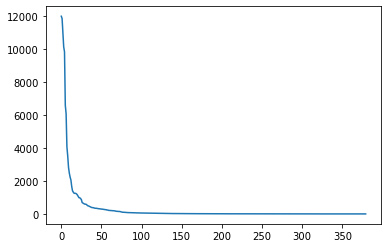

In [21]:
plt.plot(c[ind])

#### Possible number of answer types for a particular question

In [22]:
np.unique(num_types)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  19,  23,  30,  31,  47,  81,  93, 627])

In [23]:
at_db_train[np.where(num_types==627)[0][1]]

{'id': 44974,
 'question': 'who is a film producing individual',
 'category': 'resource',
 'type': ['dbo:Person',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Scientist',
  'dbo:Person',
  'dbo:Person',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Entomologist',
  'dbo:Scientist',
  'dbo:Person',
  'dbo:Person',
  'dbo:Person',
  'dbo:Person',
  'dbo:Person',
  'dbo:Scientist',
  'dbo:Person',
  'dbo:Writer',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Writer',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Writer',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Royalty',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Person',
  'dbo:Artist',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Person',
  'dbo:Agent',
  'dbo:ChristianBishop',
  'dbo:Cleric',
  'dbo:Person',
  'dbo:Politician',
  'dbo:Agent',
  'dbo:OfficeHolder',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Politician',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Noble',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Person',

In [24]:
at_db_train[np.where(num_types==627)[0][2]]

{'id': 50143,
 'question': 'who is the author of the moon of gomrath?',
 'category': 'resource',
 'type': ['dbo:Person',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Scientist',
  'dbo:Person',
  'dbo:Person',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Entomologist',
  'dbo:Scientist',
  'dbo:Person',
  'dbo:Person',
  'dbo:Person',
  'dbo:Person',
  'dbo:Person',
  'dbo:Scientist',
  'dbo:Person',
  'dbo:Writer',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Writer',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Writer',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Royalty',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Person',
  'dbo:Artist',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Person',
  'dbo:Agent',
  'dbo:ChristianBishop',
  'dbo:Cleric',
  'dbo:Person',
  'dbo:Politician',
  'dbo:Agent',
  'dbo:OfficeHolder',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Politician',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Person',
  'dbo:Agent',
  'dbo:Noble',
  'dbo:Person',
  'dbo:Agent',
  'dbo:P

In [25]:
at_db_train[np.where(num_types==93)[0][0]]

{'id': 35449,
 'question': 'where did battle of port arthur happen',
 'category': 'resource',
 'type': ['dbo:Settlement',
  'dbo:Place',
  'dbo:Location',
  'dbo:Settlement',
  'dbo:PopulatedPlace',
  'dbo:Place',
  'dbo:Location',
  'dbo:AdministrativeRegion',
  'dbo:Settlement',
  'dbo:Region',
  'dbo:PopulatedPlace',
  'dbo:Place',
  'dbo:Location',
  'dbo:Mountain',
  'dbo:NaturalPlace',
  'dbo:Place',
  'dbo:Location',
  'dbo:Settlement',
  'dbo:PopulatedPlace',
  'dbo:Place',
  'dbo:Location',
  'dbo:Settlement',
  'dbo:PopulatedPlace',
  'dbo:Place',
  'dbo:Location',
  'dbo:Settlement',
  'dbo:PopulatedPlace',
  'dbo:Place',
  'dbo:Location',
  'dbo:City',
  'dbo:Settlement',
  'dbo:PopulatedPlace',
  'dbo:Place',
  'dbo:Location',
  'dbo:AdministrativeRegion',
  'dbo:Settlement',
  'dbo:Region',
  'dbo:PopulatedPlace',
  'dbo:Place',
  'dbo:Settlement',
  'dbo:Place',
  'dbo:Location',
  'dbo:Settlement',
  'dbo:PopulatedPlace',
  'dbo:Place',
  'dbo:Location',
  'dbo:Settleme

In [26]:
at_db_train[1:25]

[{'id': 1,
  'question': 'What is the name of the opera based on Twelfth Night ?',
  'category': 'resource',
  'type': ['dbo:Opera', 'dbo:MusicalWork', 'dbo:Work']},
 {'id': 2,
  'question': 'When did Lena Horne receive the Grammy Award for Best Jazz Vocal Album?',
  'category': 'literal',
  'type': ['date']},
 {'id': 3,
  'question': 'Do Prince Harry and Prince William have the same parents?',
  'category': 'boolean',
  'type': ['boolean']},
 {'id': 5,
  'question': 'Which is the hierarchical BrainInfo ID of the frontal lobe?',
  'category': 'literal',
  'type': ['string']},
 {'id': 6,
  'question': 'What is the federated state located in the Weimar Republic?',
  'category': 'resource',
  'type': ['dbo:State', 'dbo:PopulatedPlace', 'dbo:Place', 'dbo:Location']},
 {'id': 7,
  'question': 'Did Buddhism was named after the immigration of united states',
  'category': 'boolean',
  'type': ['boolean']},
 {'id': 9,
  'question': 'What are the opera which start with the letter z',
  'categor

In [27]:
len(np.where(num_types==1)[0])

11515

In [28]:
len(np.where(num_types==627)[0])

3

In [29]:
len(np.where(num_types==93)[0])

1

### after removing multiple answer types for a particular question

In [30]:
categories = []
num_types = []
types = []

for entry in at_db_train:
    categories.append(entry['category'])
    num_types.append(len(np.unique(entry['type'])))
    types.append(np.unique(entry['type']))

types_merged = [a for sublist in types for a in sublist]
num_types = np.array(num_types)

In [31]:
t, c = np.unique(types_merged, return_counts=True)
ind = np.argsort(-c)

### New distribution of answer types

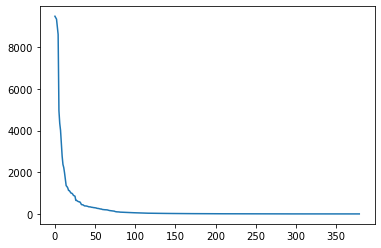

In [32]:
plt.plot(c[ind])

In [33]:
np.unique(num_types)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 23, 27, 31])

In [34]:
[len(np.where(num_types==x)[0]) for x in np.unique(num_types)]

[11560, 7340, 4578, 4556, 5161, 2425, 492, 411, 85, 31, 5, 19, 1, 1, 5]

### 21 Aug 2022

In [35]:
categories = []
num_types = []
types = []

for entry in at_db_train:
    categories.append(entry['category'])
    num_types.append(len(np.unique(entry['type'])))
    types.append(np.unique(entry['type']))
    
categories = np.array(categories)
num_types = np.array(num_types)
types = np.array(types, dtype=object)
#types = [a for sublist in types for a in sublist]

In [36]:
len(categories)

36670

In [37]:
len(types)

36670

In [38]:
types.shape

(36670,)

In [39]:
print(np.sum(categories=='boolean'))
print(np.sum(categories=='literal'))
print(np.sum(categories=='resource'))

2227
4217
30226


In [40]:
resource_types = types[np.where(categories=='resource')[0]]

In [41]:
len(np.unique([x for sublist in resource_types for x in sublist]))

376

In [42]:
xx = np.unique(np.array([len(resource_types[x]) for x in range(len(resource_types))]))

In [43]:
yy = [np.sum([True for t in resource_types if len(t)==num]) for num in xx]

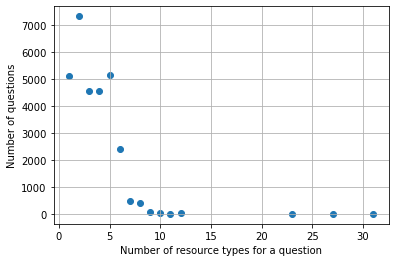

In [44]:
plt.scatter(xx,yy)
plt.grid('on')
plt.xlabel('Number of resource types for a question')
plt.ylabel('Number of questions')
plt.show()

In [45]:
resource_types[1]

array(['dbo:Location', 'dbo:Place', 'dbo:PopulatedPlace', 'dbo:State'],
      dtype='<U18')